In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
#importing our package
from Bayesian_hmm import *

### Effect of the variance - Overlapping 

In [8]:
#Class with small variances, little overlapping possible
n_c1 = 70
P1 = generate_transtion_matrix(3, persistance = True) #random transition matrix with 3 states
params1 = {0: [-2, 0.5], 1 : [0, 0.5], 2: [2, 0.5]} #state : [mu, sigma]
len_range1 = [50, 100]
Y1 = generate_samples(n_c1, len_range1, P1, params1, noise=0.1)


#class with larger variance, possible large overlapping
n_c2 = 70
params2 = {0: [-1, 2], 1 : [3, 1.5], 2: [1, 1.5]} #state : [mu, sigma]
len_range2 = [50, 100]
Y2 = generate_samples(n_c2, len_range2, P1, params2, noise=0.1)

In [10]:
P1

array([[0.82751292, 0.05601503, 0.11647205],
       [0.13901866, 0.75538089, 0.10560045],
       [0.14571592, 0.20420997, 0.6500741 ]])

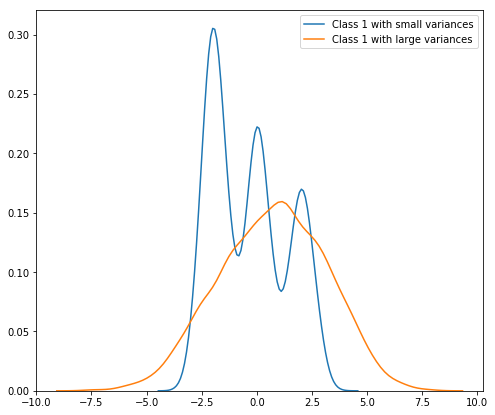

In [12]:
plt.figure(figsize=(8, 7))
sns.distplot(np.concatenate(Y1), hist=False, label="Class 1 with small variances")
sns.distplot(np.concatenate(Y2), hist=False, label="Class 1 with large variances")
plt.show()

We can see that, in the case of low variances, one can easily discriminate between the Gaussians components of the mixture whereas when the variance is large, it becomes impossible. We see below the effect on the estimators of the parameters.

In [13]:
X_data = {1:Y1, 2:Y2}

In [14]:
%time models = build_hmm_models(X_data, 2, 3, bayesian_hmm, n_iter_gibbs=2000, max_obs = 900)

Building 2  Bayesian HMM instances with 3 hidden states ...
------
Fitting Class 1 ...
Model fitted
------
Fitting Class 2 ...
Model fitted
Wall time: 8min 12s


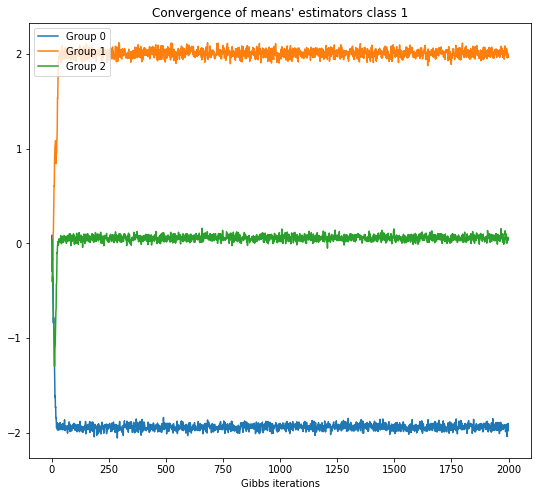

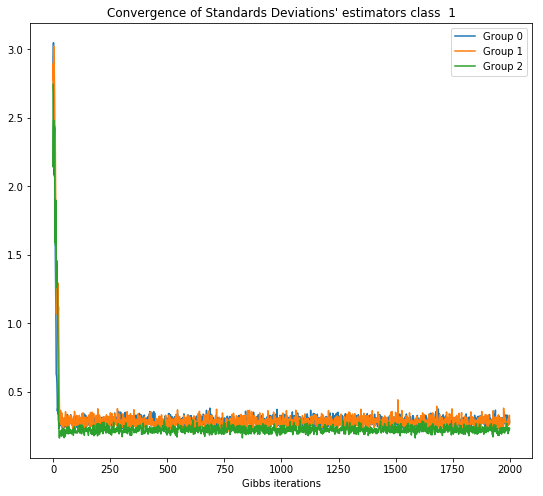

In [15]:
models[0].monitor_convergence()

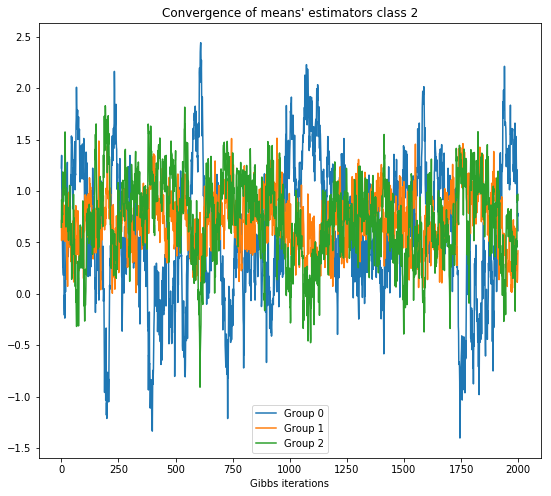

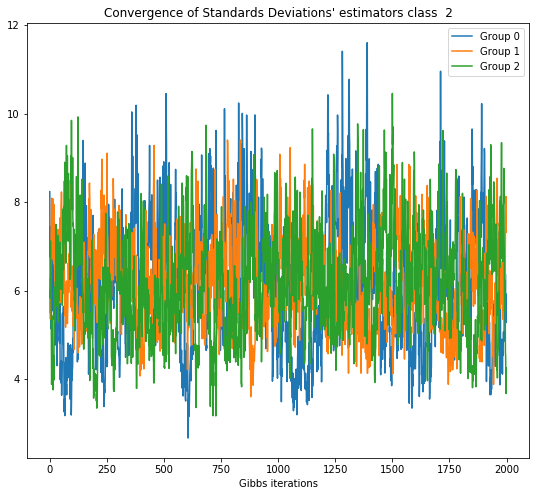

In [16]:
models[1].monitor_convergence()

### Using it for classification

We modify a bit the previous specifications in order to make the classication task more challenging and add a small noise to the sequences.

In [21]:
#Class with small variances, little overlapping possible
n_c1 = 70
P1 = generate_transtion_matrix(3, persistance = True) #random transition matrix with 3 states
params1 = {0: [-2, 1], 1 : [0, 0.5], 2: [2, 0.5]} #state : [mu, sigma]
len_range1 = [50, 100]
Y1 = generate_samples(n_c1, len_range1, P1, params1, noise=0.1)


#class with larger variance, possible large overlapping
n_c2 = 70
params2 = {0: [-2, 1.5], 1 : [3, 1.5], 2: [1, 1.5]} #state : [mu, sigma]
len_range2 = [50, 100]
P2 = generate_transtion_matrix(3, persistance = True)
Y2 = generate_samples(n_c2, len_range2, P2, params2, noise=0.1)

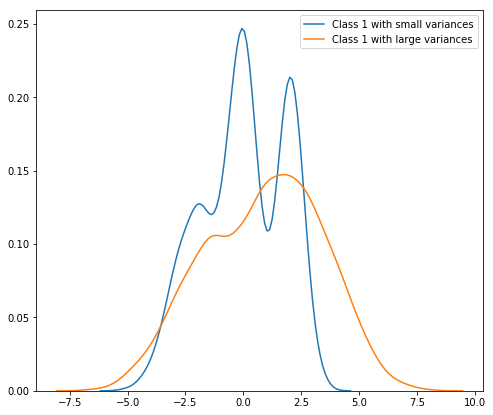

In [22]:
plt.figure(figsize=(8, 7))
sns.distplot(np.concatenate(Y1), hist=False, label="Class 1")
sns.distplot(np.concatenate(Y2), hist=False, label="Class 2")
plt.show()

In [23]:
X_train = {1:Y1[:10], 2:Y2[:10]}
X_test = Y1[10:] + Y2[10:]
y_test = [1] * len(Y1[10:]) + [2] * len(Y2[10:])

In [24]:
%time models = build_hmm_models(X_train, 2, 3, bayesian_hmm, n_iter_gibbs=2000, max_obs = 900)

Building 2  Bayesian HMM instances with 3 hidden states ...
------
Fitting Class 1 ...
Model fitted
------
Fitting Class 2 ...
Model fitted
Wall time: 5min 39s


In [33]:
preds = assign_classes(X_test, models)

Accuracy :  0.775


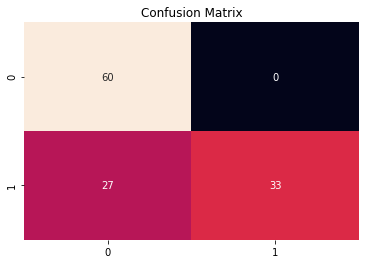

In [37]:
print("Accuracy : ", np.sum(np.array(y_test) == np.array(preds)) / len(preds))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, preds)), annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.show()